<a href="https://colab.research.google.com/github/vegorovmsk/ml_beginner_level/blob/master/jun_ml_dimension_reduction_hw_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 3. Домашнее задание

### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


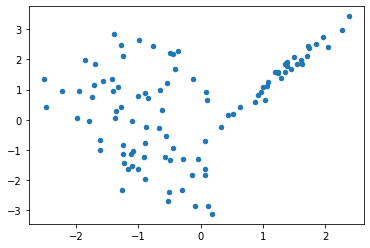

In [2]:
plt.scatter(X[:, 0], X[:, 2], 20)
plt.show()

In [3]:
from sklearn.decomposition import PCA

X1 = X[:, [0, 2]]
pca = PCA(n_components=1).fit(X1)

X1_transformed = pca.transform(X1)
X1_new = pca.inverse_transform(X1_transformed)

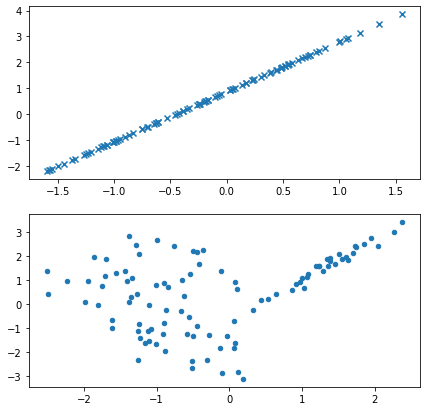

In [4]:
plt.figure(1, figsize=(7, 7))

plt.subplot(211)
plt.scatter(X1_new[:, 0], X1_new[:, 1], marker='x')

plt.subplot(212)
plt.scatter(X[:, 0], X[:, 2], 20)

plt.show()

### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

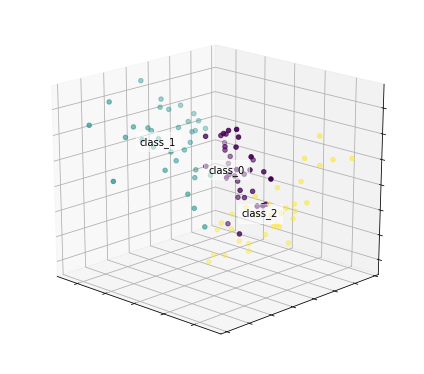

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

In [6]:
pca = PCA(n_components=2).fit(X)

X_transformed = pca.transform(X)
X_new = pca.inverse_transform(X_transformed)

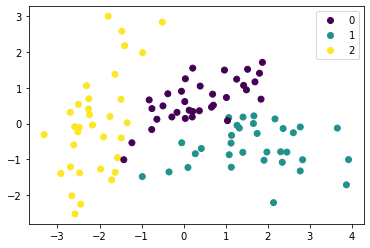

In [7]:
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=map(str, np.sort(np.unique(y).astype(int))))

plt.show()

В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.